## 1- Objetivo
 
 - Encontrar o melhor modelo para a previsão de faturamento.
 

 - Importando os dados preprocessados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import date

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/studio-estetica/main/dados_modelagem.csv'

In [3]:
dados = pd.read_csv(url, sep = ',')

In [4]:
dados.head()

,Unnamed: 0,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
0,1,2018-12-23,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,270.0
1,2,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,560.0
4,5,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,90.0


## 2. Manipulação de dados.


 - Criando novas colunas referentes a data.

In [5]:
dados = dados.drop('Unnamed: 0' , axis = 1)

In [6]:
# reorganizando os dados referentes a data 

def date_to_weekday(date):
    weekday_dict = {0:'segunda', 1:'terca', 2: 'quarta', 3: 'quinta', 4: 'sexta', 5: 'sabado', 6: 'domingo'}
    date_time_obj = datetime.datetime.strptime(date, '%Y-%m-%d')
    return weekday_dict[date_time_obj.weekday()]

date = dados['data_atendimento'].str.split("-", n = 3, expand = True)
dados['ano'] = date[0].astype('int32')
dados['dia'] = date[2].astype('int32')
dados['mes'] = date[1].astype('int32')
dados['dia_da_semana'] = dados['data_atendimento'].apply(date_to_weekday)

In [7]:
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento,ano,dia,mes,dia_da_semana
0,2018-12-23,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,270.0,2018,23,12,domingo
1,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,24,12,segunda
2,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,25,12,terca
3,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,560.0,2018,26,12,quarta
4,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,90.0,2018,27,12,quinta


In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_atendimento        740 non-null    object 
 1   design_de_sobrancelhas  740 non-null    float64
 2   design_coloracao        740 non-null    float64
 3   design_coloracao_buco   740 non-null    float64
 4   buco                    740 non-null    float64
 5   brown_lamination        740 non-null    float64
 6   micropigmentacao        740 non-null    float64
 7   extensao_de_cilios      740 non-null    float64
 8   lash_lifting            740 non-null    float64
 9   limpeza_de_pele         740 non-null    float64
 10  microagulhamento        740 non-null    float64
 11  peeling_quimico         740 non-null    float64
 12  massagem_relaxante      740 non-null    float64
 13  pacote_massagem_5       740 non-null    float64
 14  drenagem_linfatica      740 non-null    fl

 - Reordenando as colunas

In [9]:
dados.columns

Index(['data_atendimento', 'design_de_sobrancelhas', 'design_coloracao',
       'design_coloracao_buco', 'buco', 'brown_lamination', 'micropigmentacao',
       'extensao_de_cilios', 'lash_lifting', 'limpeza_de_pele',
       'microagulhamento', 'peeling_quimico', 'massagem_relaxante',
       'pacote_massagem_5', 'drenagem_linfatica', 'striort', 'qtde_clientes',
       'faturamento', 'ano', 'dia', 'mes', 'dia_da_semana'],
      dtype='object')

In [10]:
dados = dados[['data_atendimento', 'design_de_sobrancelhas', 'design_coloracao',
       'design_coloracao_buco', 'buco', 'brown_lamination', 'micropigmentacao',
       'extensao_de_cilios', 'lash_lifting', 'limpeza_de_pele',
       'microagulhamento', 'peeling_quimico', 'massagem_relaxante',
       'pacote_massagem_5', 'drenagem_linfatica', 'striort', 'qtde_clientes', 'dia', 'mes','ano', 'dia_da_semana',
       'faturamento']]

In [11]:
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,dia,mes,ano,dia_da_semana,faturamento
0,2018-12-23,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,23,12,2018,domingo,270.0
1,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,12,2018,segunda,0.0
2,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,12,2018,terca,0.0
3,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,26,12,2018,quarta,560.0
4,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,27,12,2018,quinta,90.0


 - Excluindo os dados referentes ao periodo da pandemia.
 
     Período de 20 de marco a 1 de julho.

In [12]:
dados.query('data_atendimento == "2020-07-01"')

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,dia,mes,ano,dia_da_semana,faturamento
556,2020-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7,2020,quarta,0.0


In [13]:
dados.loc[453:556]

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,dia,mes,ano,dia_da_semana,faturamento
453,2020-03-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,3,2020,sexta,0.0
454,2020-03-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,3,2020,sabado,0.0
455,2020-03-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,3,2020,domingo,0.0
456,2020-03-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,3,2020,segunda,0.0
457,2020-03-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,3,2020,terca,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,2020-06-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,6,2020,sabado,0.0
553,2020-06-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,6,2020,domingo,0.0
554,2020-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,6,2020,segunda,0.0
555,2020-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,6,2020,terca,0.0


In [14]:
dados_pandemia =[]
for i in range(453,556):
    dados_pandemia.append(i)

dados = dados.drop(dados_pandemia)
dados = dados.reset_index()
dados = dados.drop('index', axis = 1)
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,dia,mes,ano,dia_da_semana,faturamento
0,2018-12-23,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,23,12,2018,domingo,270.0
1,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,12,2018,segunda,0.0
2,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,12,2018,terca,0.0
3,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,26,12,2018,quarta,560.0
4,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,27,12,2018,quinta,90.0


 - Removendo os domingos.

In [15]:
dados.iloc[0,0] = '2018-12-22'
dados.iloc[0,20] = 'sabado'

In [16]:
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,dia,mes,ano,dia_da_semana,faturamento
0,2018-12-22,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,23,12,2018,sabado,270.0
1,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,12,2018,segunda,0.0
2,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,12,2018,terca,0.0
3,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,26,12,2018,quarta,560.0
4,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,27,12,2018,quinta,90.0


In [17]:
dados = dados.set_index('dia_da_semana')
dados = dados.drop('domingo')
dados = dados.reset_index()
dados.head()

,dia_da_semana,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,dia,mes,ano,faturamento
0,sabado,2018-12-22,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,23,12,2018,270.0
1,segunda,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,12,2018,0.0
2,terca,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25,12,2018,0.0
3,quarta,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,26,12,2018,560.0
4,quinta,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,27,12,2018,90.0


In [18]:
dados.shape

(547, 22)

In [19]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dia_da_semana           547 non-null    object 
 1   data_atendimento        547 non-null    object 
 2   design_de_sobrancelhas  547 non-null    float64
 3   design_coloracao        547 non-null    float64
 4   design_coloracao_buco   547 non-null    float64
 5   buco                    547 non-null    float64
 6   brown_lamination        547 non-null    float64
 7   micropigmentacao        547 non-null    float64
 8   extensao_de_cilios      547 non-null    float64
 9   lash_lifting            547 non-null    float64
 10  limpeza_de_pele         547 non-null    float64
 11  microagulhamento        547 non-null    float64
 12  peeling_quimico         547 non-null    float64
 13  massagem_relaxante      547 non-null    float64
 14  pacote_massagem_5       547 non-null    fl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e234adb50>,
      dtype=object)

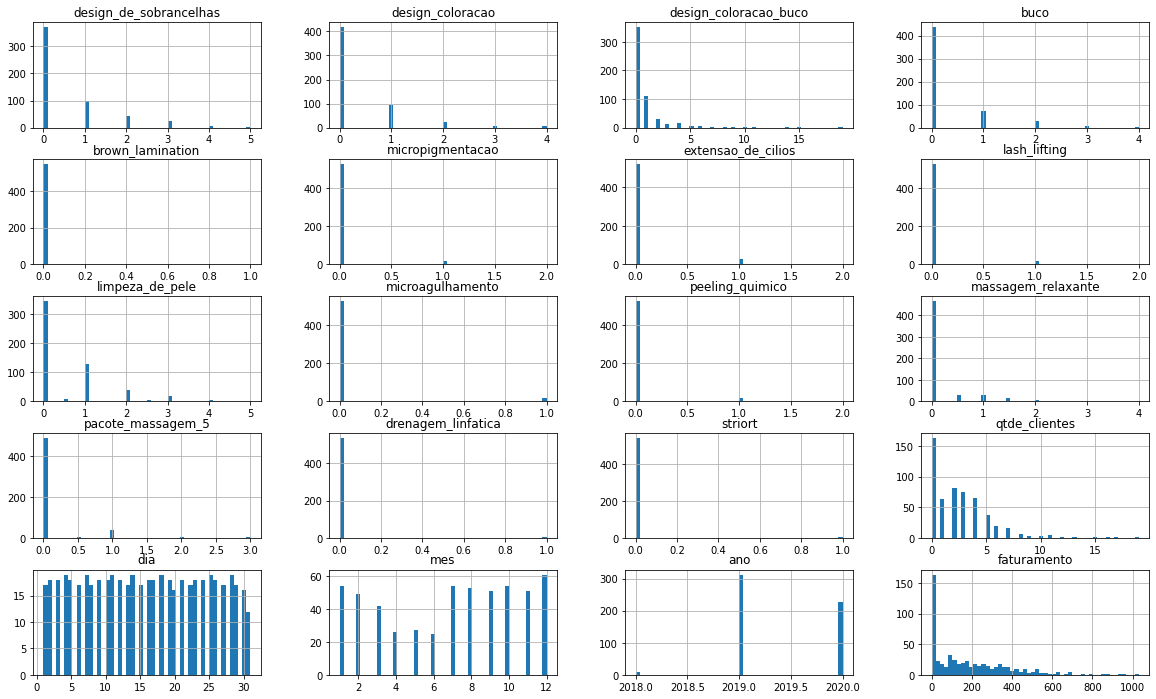

In [22]:
dados.hist(bins=50, figsize=(20,12))

In [21]:
dados.columns

Index(['dia_da_semana', 'data_atendimento', 'design_de_sobrancelhas',
       'design_coloracao', 'design_coloracao_buco', 'buco', 'brown_lamination',
       'micropigmentacao', 'extensao_de_cilios', 'lash_lifting',
       'limpeza_de_pele', 'microagulhamento', 'peeling_quimico',
       'massagem_relaxante', 'pacote_massagem_5', 'drenagem_linfatica',
       'striort', 'qtde_clientes', 'dia', 'mes', 'ano', 'faturamento'],
      dtype='object')

In [23]:
cols = ['design_de_sobrancelhas',
       'design_coloracao', 'design_coloracao_buco', 'buco', 'brown_lamination',
       'micropigmentacao', 'extensao_de_cilios', 'lash_lifting',
       'limpeza_de_pele', 'microagulhamento', 'peeling_quimico',
       'massagem_relaxante', 'pacote_massagem_5', 'drenagem_linfatica',
       'striort', 'qtde_clientes','faturamento']

In [24]:
dados[cols] = dados[cols].apply(np.log1p)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e220e9f10>,
      dtype=object)

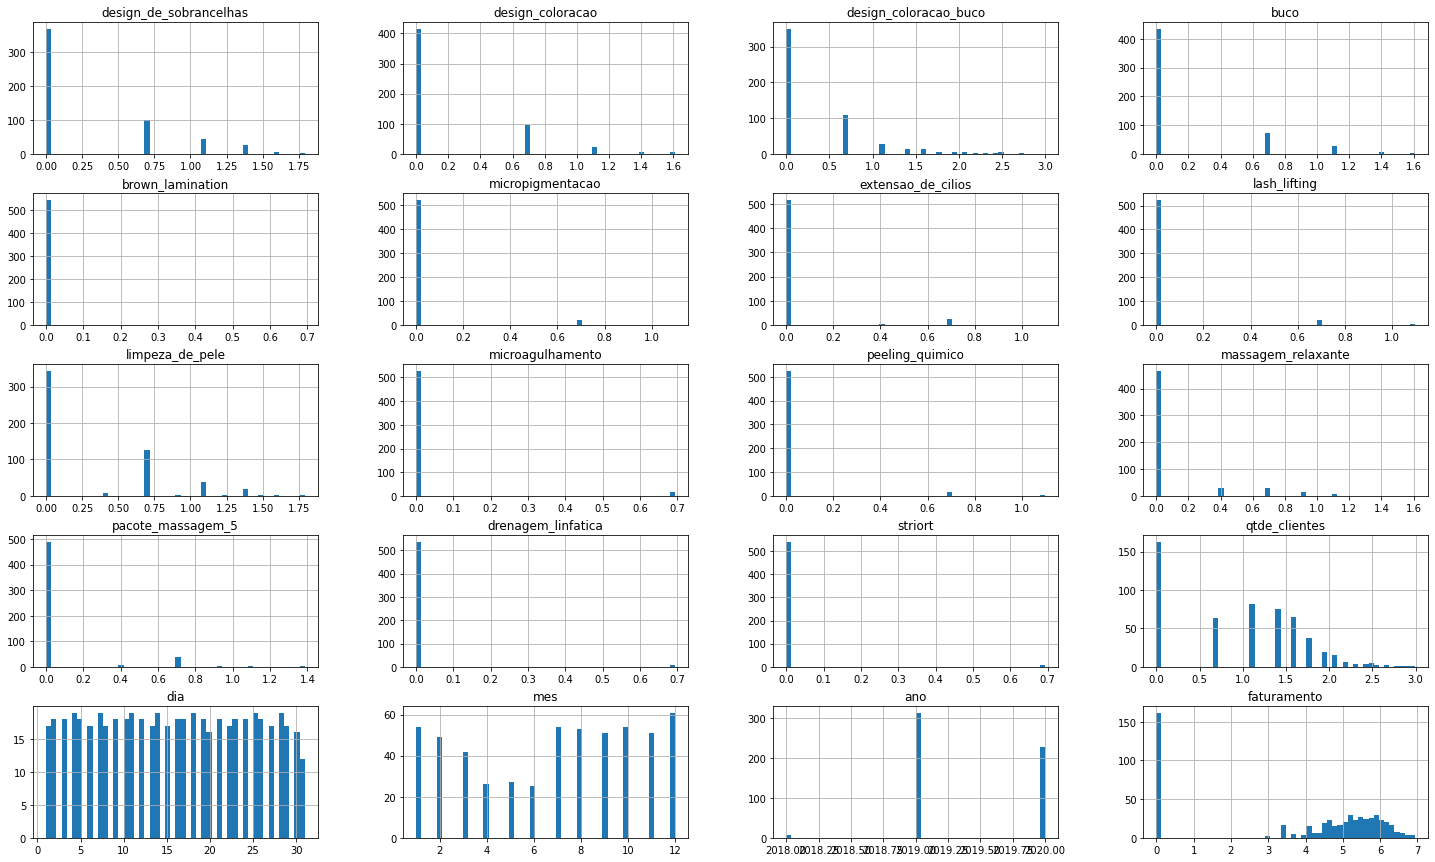

In [28]:
dados.hist(bins=50, figsize=(25,15))

In [29]:
dados.head()

,dia_da_semana,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,dia,mes,ano,faturamento
0,sabado,2018-12-22,0.000000,0.0,2.079442,0.000000,0.0,0.000000,0.000000,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,2.079442,23,12,2018,5.602119
1,segunda,2018-12-24,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,24,12,2018,0.000000
2,terca,2018-12-25,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,25,12,2018,0.000000
3,quarta,2018-12-26,0.693147,0.0,0.693147,0.693147,0.0,0.693147,0.693147,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.609438,26,12,2018,6.329721
4,quinta,2018-12-27,0.000000,0.0,0.693147,0.000000,0.0,0.000000,0.000000,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,27,12,2018,4.510860


 ## 4. Machine learning

 - Transformando variáveis categóricas em variáveis numéricas.

In [30]:
dados.columns

Index(['dia_da_semana', 'data_atendimento', 'design_de_sobrancelhas',
       'design_coloracao', 'design_coloracao_buco', 'buco', 'brown_lamination',
       'micropigmentacao', 'extensao_de_cilios', 'lash_lifting',
       'limpeza_de_pele', 'microagulhamento', 'peeling_quimico',
       'massagem_relaxante', 'pacote_massagem_5', 'drenagem_linfatica',
       'striort', 'qtde_clientes', 'dia', 'mes', 'ano', 'faturamento'],
      dtype='object')

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
enconder = LabelEncoder()

In [33]:
dados['dia_da_semana'] = enconder.fit_transform(dados['dia_da_semana'])
dados['data_atendimento'] = enconder.fit_transform(dados['data_atendimento'])

 - Selecionando apenas as colunas utilizadas na modelagem.

In [34]:
dados = dados[['qtde_clientes','mes','dia_da_semana','faturamento']]

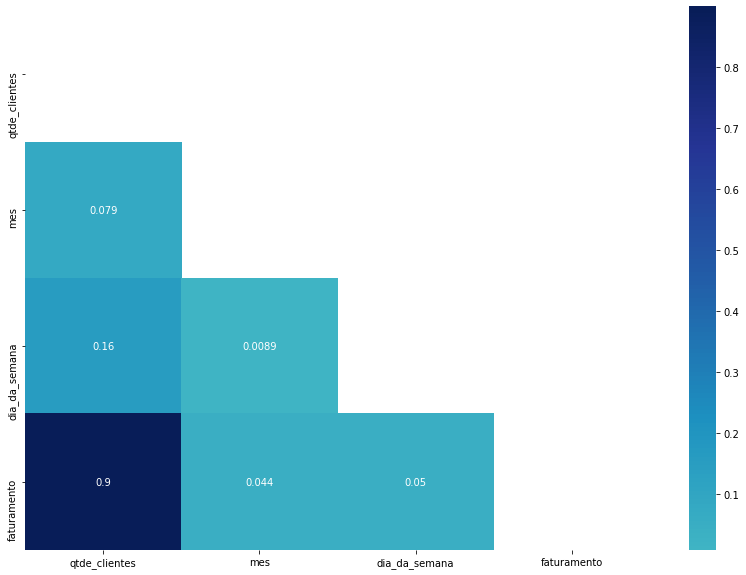

In [35]:
plt.figure(figsize=(14,10))

corr = dados.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

 - Separando as amostras de treino e teste.

In [36]:
X = dados[['qtde_clientes','mes','dia_da_semana']]
Y = dados['faturamento']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.25,random_state=0)

 - Modelo "Baseline" (Ponto de partida)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression()
lr.fit(X_treino, Y_treino)
lr.score(X_teste, Y_teste)

0.8146486423064878

In [41]:
y_pred = lr.predict(X_teste)

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [44]:
MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)

print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 0.8855
MSE = 1.1083
RMSE = 1.0528
R2 = 0.8146


 - Exemplo de normalização dos dados (outliers)

In [45]:
# train['design_coloracao_buco']=train['design_coloracao_buco'].apply(np.log1p)
# train['faturamento']=train['faturamento'].apply(np.log1p)

In [46]:
# test['design_coloracao_buco']=test['design_coloracao_buco'].apply(np.log1p)
# test['faturamento']=test['faturamento'].apply(np.log1p)

 - Machine learning

In [47]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_treino,Y_treino)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [48]:
y_pred = neigh.predict(X_teste)

In [49]:
# Root Mean Squared Error
np.sqrt(np.mean((y_pred-Y_teste.values)**2))

1.1052736480787222

In [50]:
# Mean Squared Error
np.mean((y_pred-Y_teste.values)**2)

1.2216298371372472

In [51]:
# Mean Absolute Error
np.mean(np.abs(y_pred-Y_teste.values))

0.7457531316562507

In [52]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(Y_teste, y_pred)

0.7956966722342548

 - Triagem com outros modelos

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
           
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9781566564628894
Test score 0.8977385955184732
Treinando RandomForestRegressor
Train score 0.9748739398101884
Test score 0.9276205139019642
Treinando MLPRegressor
Train score 0.8656408721133632
Test score 0.8721782395906489
Treinando XGBRegressor
[03:37:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.9556490692442229
Test score 0.9503659585552738


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


- Repetindo com validação cruzada.

In [54]:
# repetindo processo com validação cruzada
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Validation score', val_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9781566564628894
Validation score [0.92101824 0.9463984  0.8266171  0.94133883 0.89072199]
Test score 0.8976903985035309
Treinando RandomForestRegressor
Train score 0.9746927152125273
Validation score [0.94076694 0.9518187  0.86290966 0.95054873 0.91604037]
Test score 0.9268977620890951
Treinando MLPRegressor
Train score 0.8568522292645268
Validation score [0.90011121 0.83889747 0.75776808 0.82325813 0.84786176]
Test score 0.8667267219999469
Treinando XGBRegressor
[03:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favo

## XGBRegressor 

 - Gridsearch

In [52]:
#  Todo: calibração do modelo
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4,0.5],
             'max_depth':np.arange(0,10),
             'n_estimators':np.arange(0,100,10),
              }]
            
xgb = XGBRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=5)
gs.fit(X_treino, Y_treino)

[03:11:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=1,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                          'max_depth': array([0, 1, 2, 3, 4, 5, 

In [53]:
gs.best_params_

{'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 10}

In [54]:
xgb = gs.best_estimator_

In [55]:
train_score = xgb.score(X_treino, Y_treino)
val_score = cross_val_score(xgb, X_treino, Y_treino, cv=3)
test_score = xgb.score(X_teste, Y_teste)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

[03:11:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:11:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:11:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.5506070350797525
Validation score [0.42382775 0.48307332 0.61338092]
Test score 0.5853632358986134


 - Redefinindo y_pred e reacalculando o erro

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [57]:
y_pred = xgb.predict(X_teste)

In [58]:
MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)

print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 88.8586
MSE = 15779.0464
RMSE = 125.6147
R2 = 0.5854


## RandonForestRegressor

 - GridSearch

In [59]:
from sklearn.model_selection import GridSearchCV
parameters=[{'criterion' : ['mae','mse'],
             'max_depth':[1,2,3,4,5,6,7,8,9,10],
             'n_estimators':np.arange(10,120,10),
            }]
            
reg = RandomForestRegressor(n_estimators=100, max_depth=2)
gs = GridSearchCV(reg,parameters,scoring='r2',n_jobs=-1,cv=5 , refit=True)
gs.fit(X_treino, Y_treino)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=2,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [60]:
gs.best_params_

{'criterion': 'mse', 'max_depth': 3, 'n_estimators': 20}

In [61]:
reg = gs.best_estimator_

In [62]:
train_score = reg.score(X_treino, Y_treino)
val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
test_score = reg.score(X_teste, Y_teste)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

Train score 0.5473479458997407
Validation score [0.48414696 0.40154464 0.43231519 0.58011334 0.58683484]
Test score 0.5759357700534478


In [63]:
y_pred = reg.predict(X_teste)

In [64]:
MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)

In [65]:
print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 87.9048
MSE = 16137.8096
RMSE = 127.0347
R2 = 0.5759


In [65]:
# import pickle
# # now you can save it to a file
# with open('xgboost_regression.pkl', 'wb') as f:
#     pickle.dump(reg, f)


In [71]:
X_teste

,qtde_clientes,mes,dia_da_semana
453,0.0,7,1
482,0.0,7,2
516,3.0,9,1
542,4.0,9,4
85,0.0,3,4
...,...,...,...
616,3.0,12,5
175,0.0,6,0
211,0.0,7,4
467,2.0,7,1


In [74]:
Y_teste

453      0.0
482      0.0
516    140.0
542    300.0
85       0.0
       ...  
616    320.0
175      0.0
211      0.0
467     60.0
534      0.0
Name: faturamento, Length: 160, dtype: float64

In [69]:

reg.predict([[3,12,5]])

array([238.07810625])